In [1]:
# 타이타닉 데이터
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [18]:
# age에 결측치가 891 - 714개만큼 존재, 이를 없애야한다.
titanic['age'].fillna(
    titanic['age'].mean(), 
    inplace=True )

In [19]:
y = titanic["survived"]
X = titanic[['pclass','age']]
# 훈련, 테스트로 나누기
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(
    X, 
    y,
    random_state=20220411,
    stratify=y
)

In [20]:
print(x_tr.shape, x_te.shape)  # 기본 값인 75 : 25
print(y_tr)

(668, 2) (223, 2)
501    0
837    0
43     1
198    1
877    0
      ..
308    0
570    1
772    0
852    0
275    1
Name: survived, Length: 668, dtype: int64


In [21]:
print(x_tr.iloc[:5,:])
print(y_tr[:5])

     pclass        age
501       3  21.000000
837       3  29.699118
43        2   3.000000
198       3  29.699118
877       3  19.000000
501    0
837    0
43     1
198    1
877    0
Name: survived, dtype: int64


In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_tr, y_tr)

KNeighborsClassifier(n_neighbors=3)

In [39]:
pred = model.predict(x_te)  # 여러개를 한꺼번에 예측
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1], dtype=int64)

In [37]:
y_te # 답

508    0
14     0
830    1
222    0
669    1
      ..
207    1
399    1
677    1
121    0
750    1
Name: survived, Length: 223, dtype: int64

In [42]:
sum(pred == y_te) / len(pred)  # 정답율 

0.672645739910314

In [43]:
model.score(x_te, y_te) # 정답율

0.672645739910314

In [38]:
x_te.iloc[:5, :]

,pclass,age
508,3,28.000000
14,3,14.000000
830,3,15.000000
222,3,51.000000
669,1,29.699118


In [24]:
y_te[:5]

508    0
14     0
830    1
222    0
669    1
Name: survived, dtype: int64

#### 윗쪽예제는 pclass, age 칼럼만으로 생존여부를 예측한다.
#### fare 칼럼을 추가하여 생존여부예측 정답율을 출력하세요.

In [50]:
y = titanic["survived"]
X = titanic[['pclass','age','fare']]
# 훈련, 테스트로 나누기
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(
    X, 
    y,
    random_state=20220411,
    stratify=y
)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_tr, y_tr)

KNeighborsClassifier(n_neighbors=3)

In [52]:
pred = model.predict(x_te)  # 여러개를 한꺼번에 예측
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0], dtype=int64)

In [53]:
model.score(x_te, y_te) # 정답율

0.6457399103139013

In [57]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    random_state=0)
x_train.shape, x_test.shape

((112, 4), (38, 4))

In [58]:
k_range = range(1,11)
train_score = []
test_score = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
    train_score.append(model.score(x_train, y_train))
    test_score.append(model.score(x_test, y_test))
    
print(train_score)
print(test_score)

[1.0, 0.9642857142857143, 0.9642857142857143, 0.9732142857142857, 0.9732142857142857, 0.9642857142857143, 0.9732142857142857, 0.9732142857142857, 0.9642857142857143, 0.9732142857142857]
[0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158]


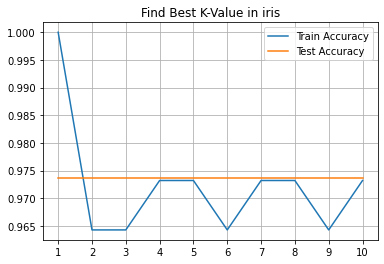

In [61]:
import matplotlib.pyplot as plt
plt.plot(k_range, train_score, label='Train Accuracy')
plt.plot(k_range, test_score, label='Test Accuracy')
plt.xticks(k_range)
plt.title('Find Best K-Value in iris')
plt.legend()
plt.grid()
plt.show()

In [62]:
from sklearn.preprocessing import StandardScaler # 표준화
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3).fit(x_train_sc, y_train)
model.score(x_train_sc, y_train), model.score(x_test_sc, y_test)

(0.9732142857142857, 0.9736842105263158)

In [ ]:
from sklearn.preprocessing import MinMaxScaler   # 정규화
scaler = MinMaxScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3).fit(x_train_sc, y_train)
model.score(x_train_sc, y_train), model.score(x_test_sc, y_test)

(0.9732142857142857, 0.9736842105263158)